In [1]:
import pandas as pd
import polars as pl
import seaborn as sns
import math
from matplotlib import pyplot as plt
import sys
import os

# Add the folder containing cat_eda.py to the system path
sys.path.append(os.path.abspath(os.path.join('functions')))
from functions import pipeline_helpers
from cat_eda import *
from num_eda import *
from functions.eda import *

In [2]:
df=pd.read_csv("Zomato Dataset.csv")
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [3]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.shape

(41359, 20)

In [6]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


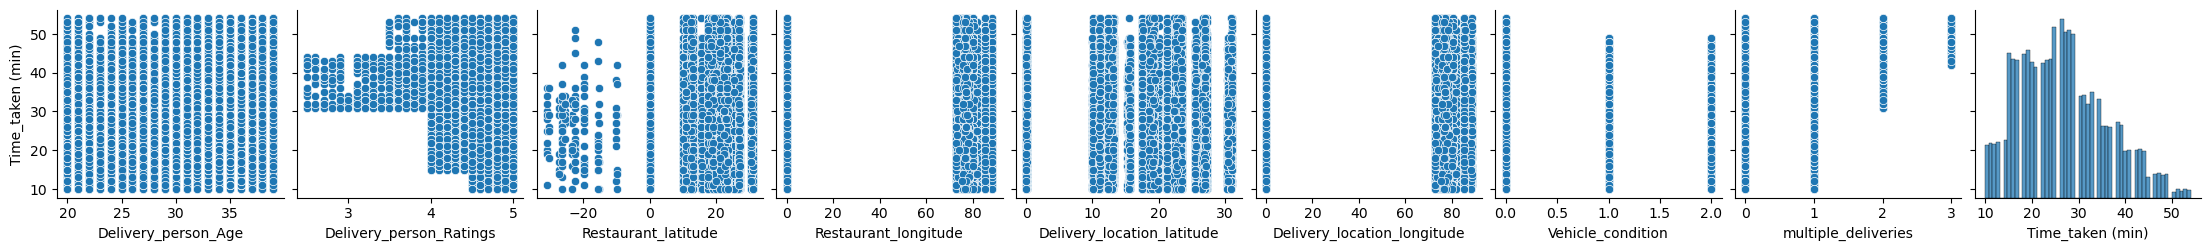

In [7]:
data_filtered = df.drop(["ID", "Delivery_person_ID"], axis=1)

# Create the pairplot with 'Time_taken (min)' as the y-axis variable
sns.pairplot(data_filtered, y_vars=["Time_taken (min)"])
plt.show()

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

In [9]:

df['Distance_km'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],
                                                   row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [10]:

# Function to handle both time in HH:MM format and fractional values in string form
def convert_time_to_minutes(val):
    # If the value is a string and contains a colon, it's in HH:MM format
    if isinstance(val, str) and ":" in val:
        try:
            # Convert time string to minutes (HH * 60 + MM)
            hours, minutes = map(int, val.split(":"))
            return hours * 60 + minutes
        except ValueError:
            return 0  # Return 0 if there's an issue splitting
    elif isinstance(val, str):  # If the value is a string (fractional hours in string form)
        try:
            # Convert fractional hours (string) to float and then multiply by 60
            return float(val) * 60
        except ValueError:
            return 0  # If conversion fails, return 0
    return 0  # For non-string values or invalid inputs

# Apply the conversion function to both columns
df['Time_Orderd_in_minutes'] = df['Time_Orderd'].apply(convert_time_to_minutes)
df['Time_Order_picked_in_minutes'] = df['Time_Order_picked'].apply(convert_time_to_minutes)
df["Time_Differece_in_minutes"]=df['Time_Order_picked_in_minutes']-df['Time_Orderd_in_minutes']

In [11]:
df.drop(["Time_Orderd","Time_Order_picked"],inplace=True,axis=1)

In [12]:

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.drop(["ID", "Delivery_person_ID"], axis=1).columns if df[col].dtype in ['int64', 'float64']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Delivery_person_ID", axis=1),  df[["ID"]], test_size=0.3, 
                                                    random_state=42, 
                                                    shuffle=True)


train_data = X_train.merge(y_train, on="ID")
test_data = X_test.merge(y_test, on="ID")
train_data.shape, test_data.shape

((28951, 21), (12408, 21))

In [14]:
num_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'Distance_km',
 'Time_Orderd_in_minutes',
 'Time_Order_picked_in_minutes',
 'Time_Differece_in_minutes']

In [15]:
train_data=train_data.drop("Order_Date",axis=1)
test_data=test_data.drop("Order_Date",axis=1)
cat_cols.remove("Order_Date")




In [16]:
cat_cols = [col for col in train_data.drop("ID",axis=1).columns if df[col].dtype == 'object']
num_cols = [col for col in train_data.drop("Time_taken (min)",axis=1).columns if df[col].dtype in ['int64', 'float64']]

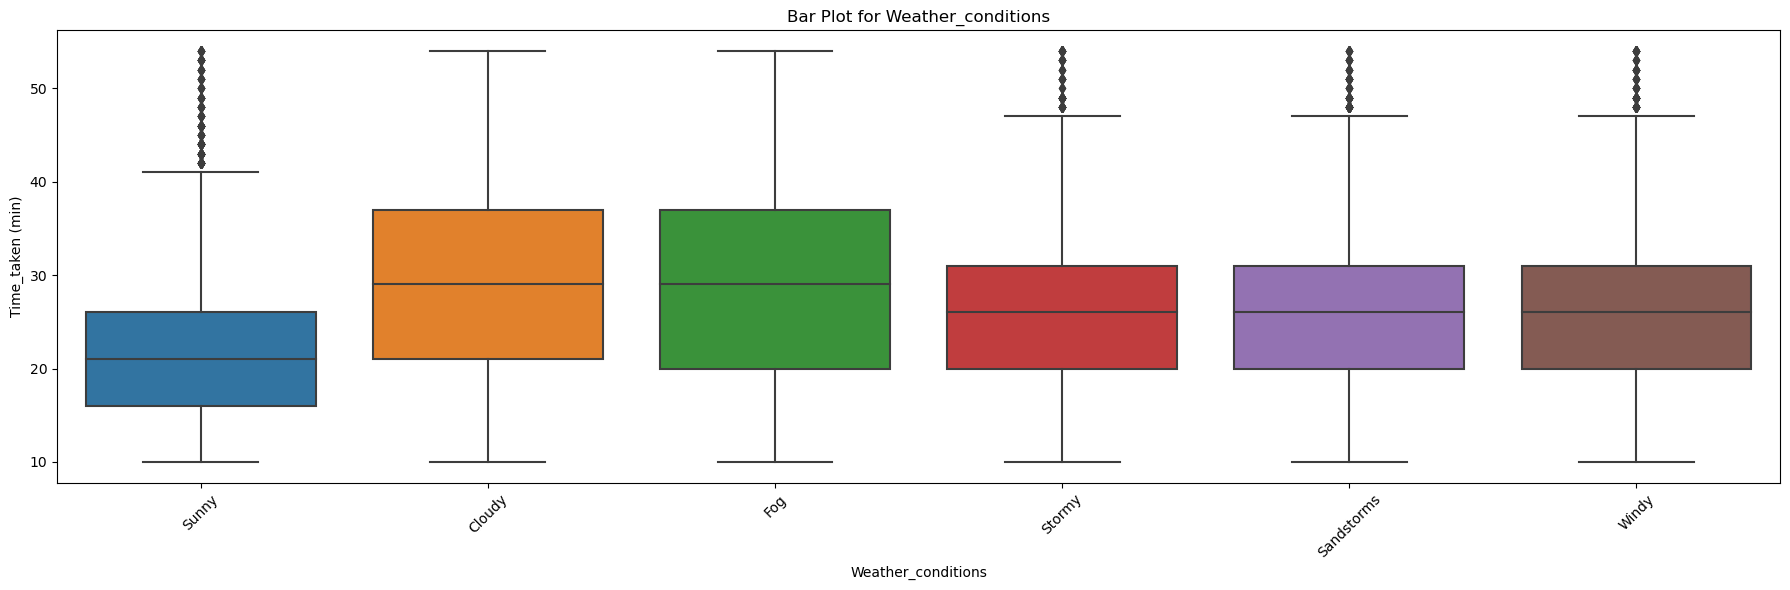

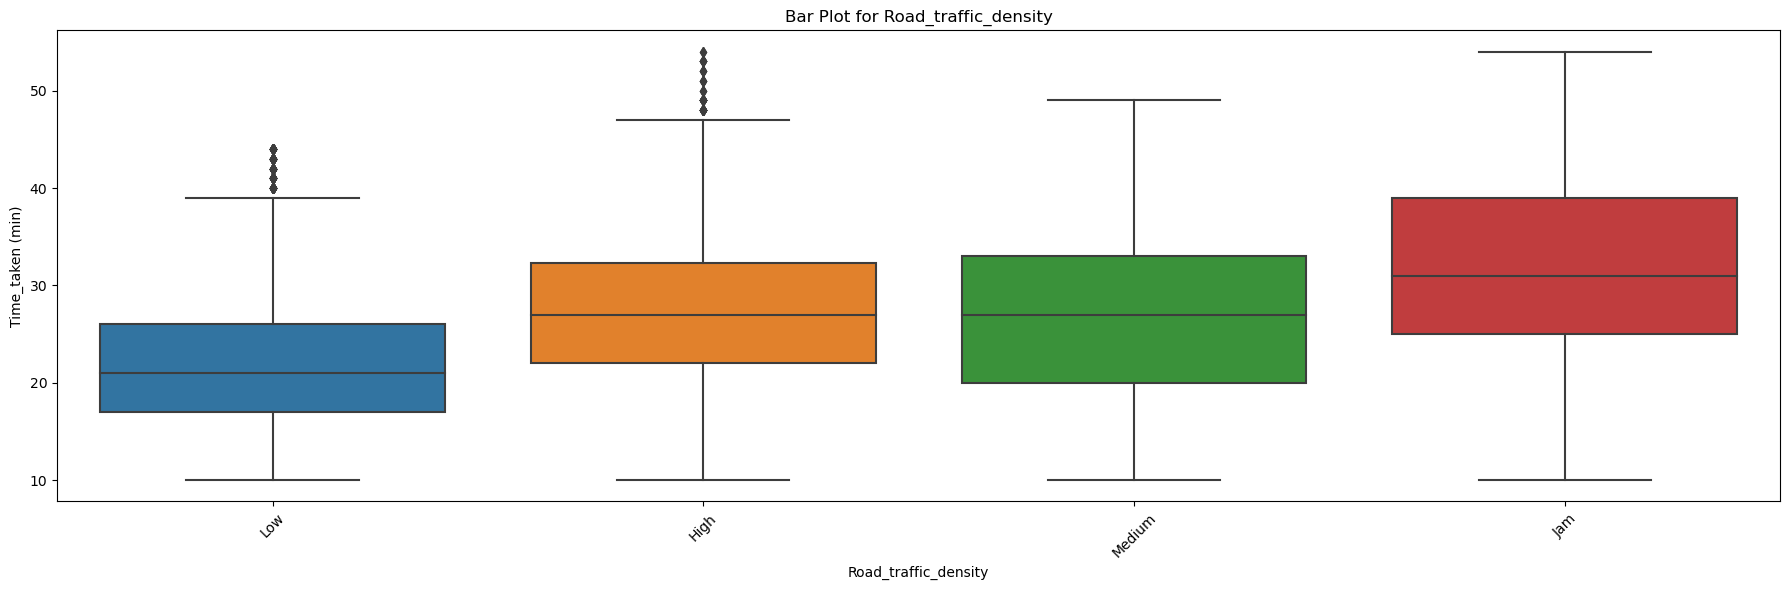

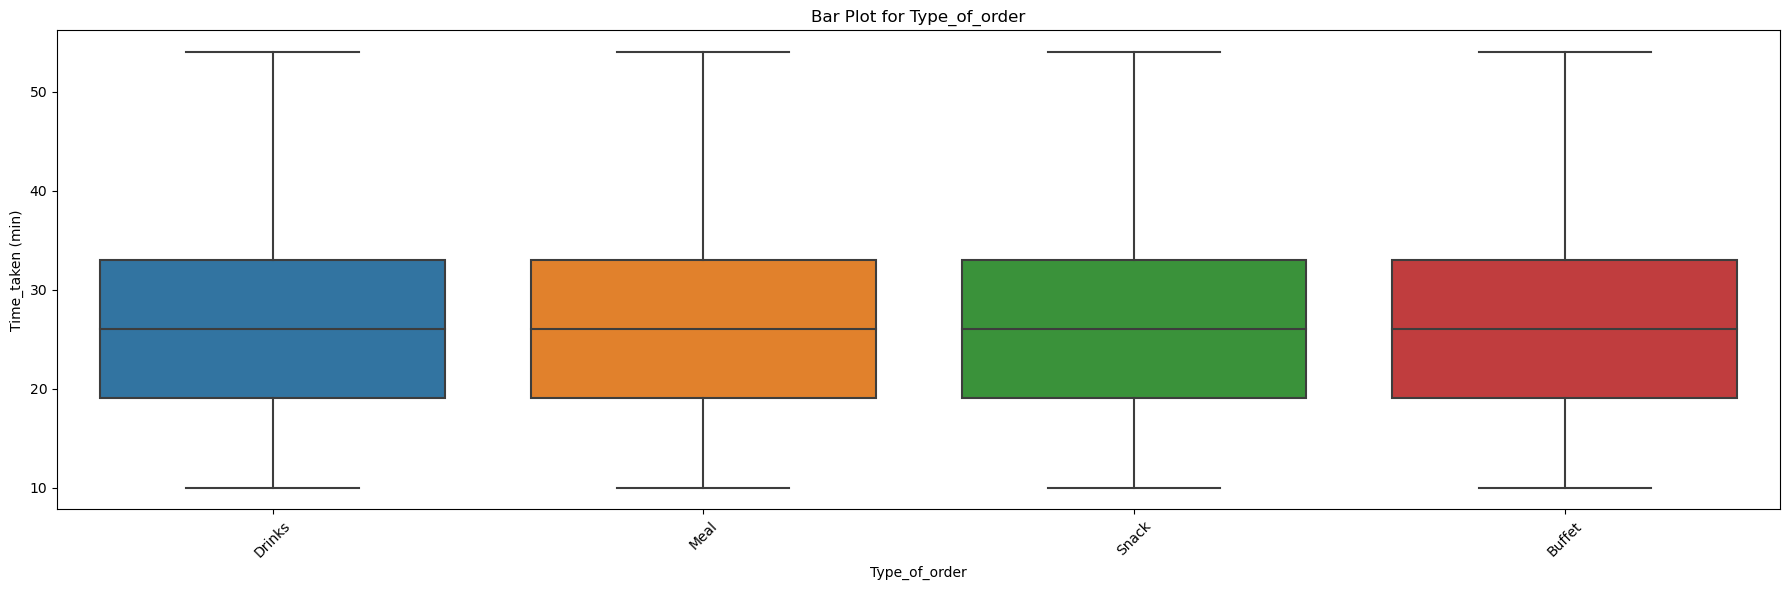

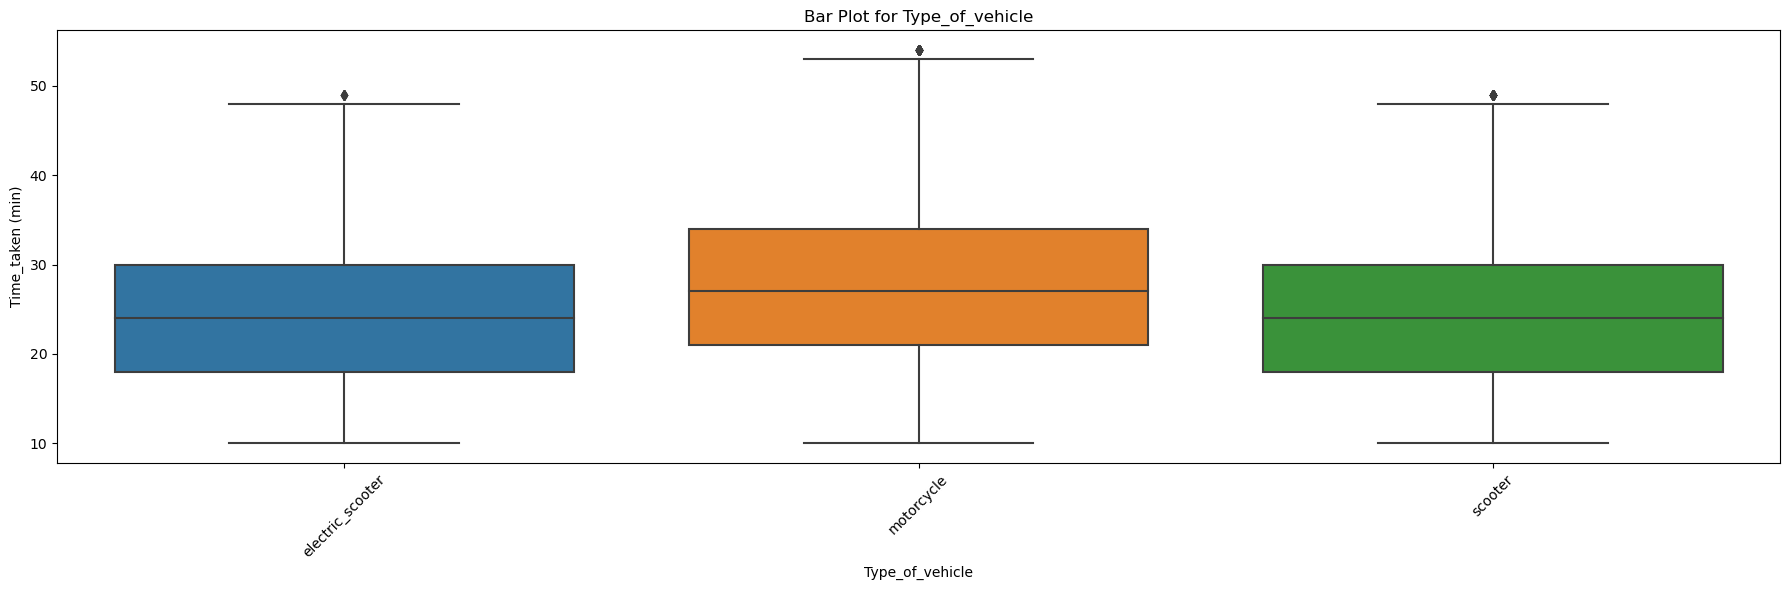

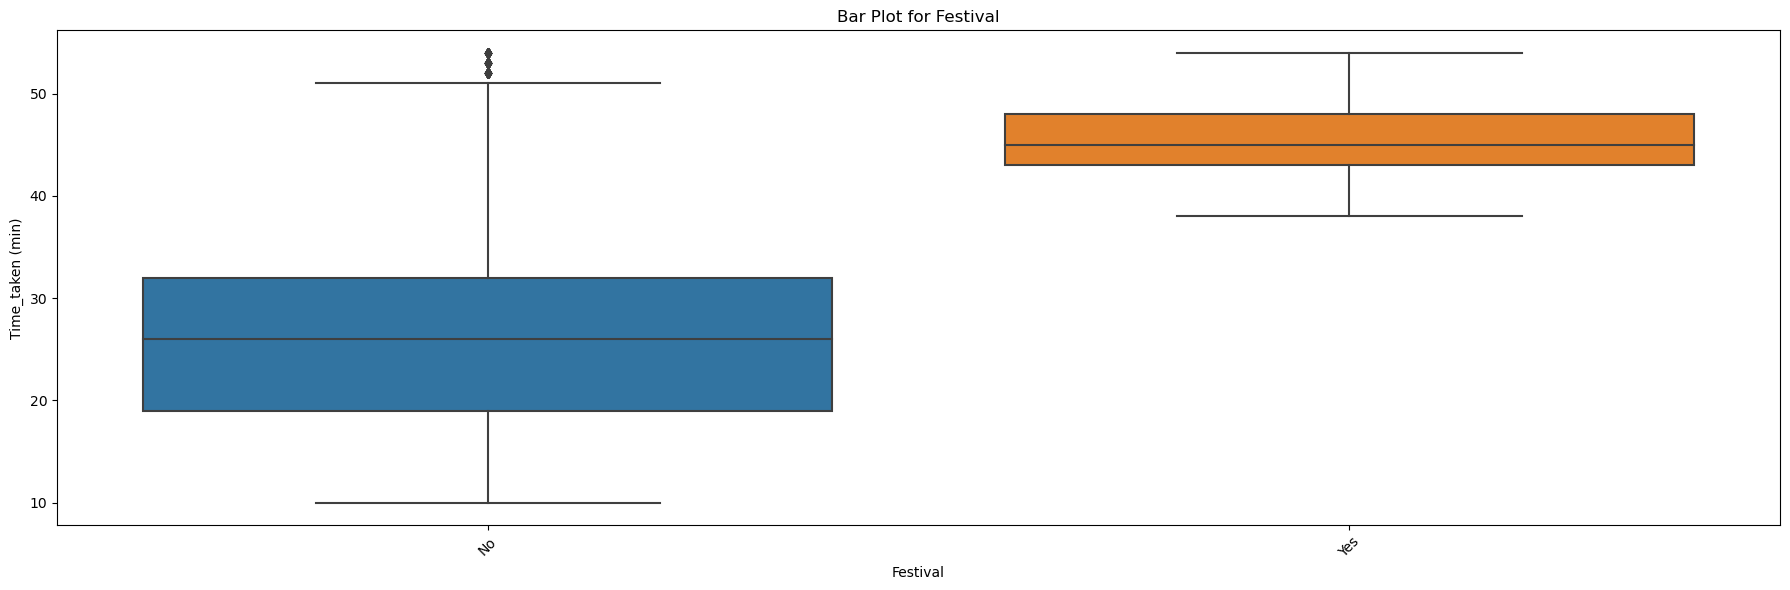

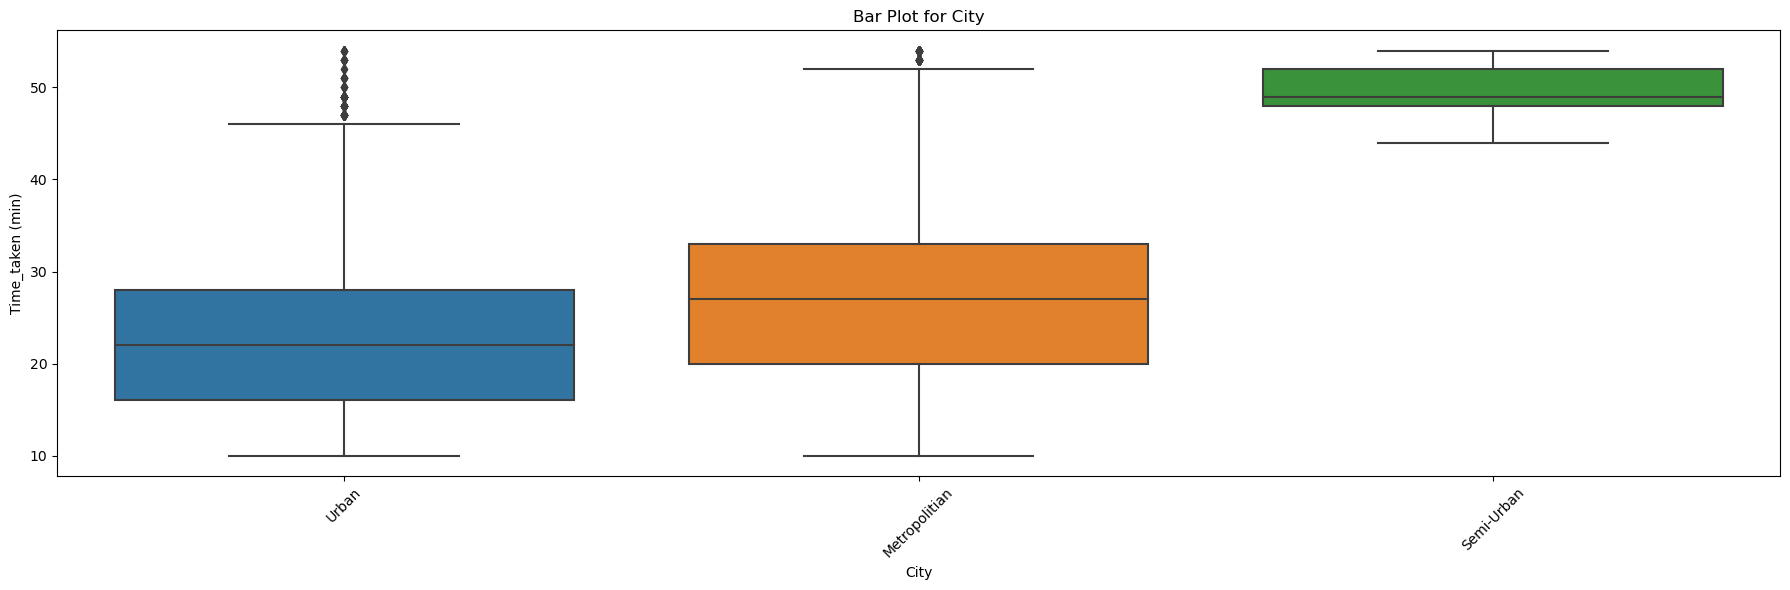

In [17]:
categorical_box_plot(train_data,cat_cols,"Time_taken (min)")

In [18]:
train_data[cat_cols]

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,Sunny,Low,Drinks,electric_scooter,No,Urban
1,Cloudy,High,Meal,motorcycle,No,Metropolitian
2,Sunny,Low,Meal,motorcycle,No,Urban
3,Fog,High,Snack,scooter,No,Metropolitian
4,Stormy,Medium,Buffet,motorcycle,No,Metropolitian
...,...,...,...,...,...,...
28946,Sunny,Medium,Drinks,scooter,No,Urban
28947,Sandstorms,Medium,Buffet,electric_scooter,No,Urban
28948,Cloudy,Low,Meal,motorcycle,No,Metropolitian
28949,Windy,Low,Meal,motorcycle,No,Metropolitian


<Axes: >

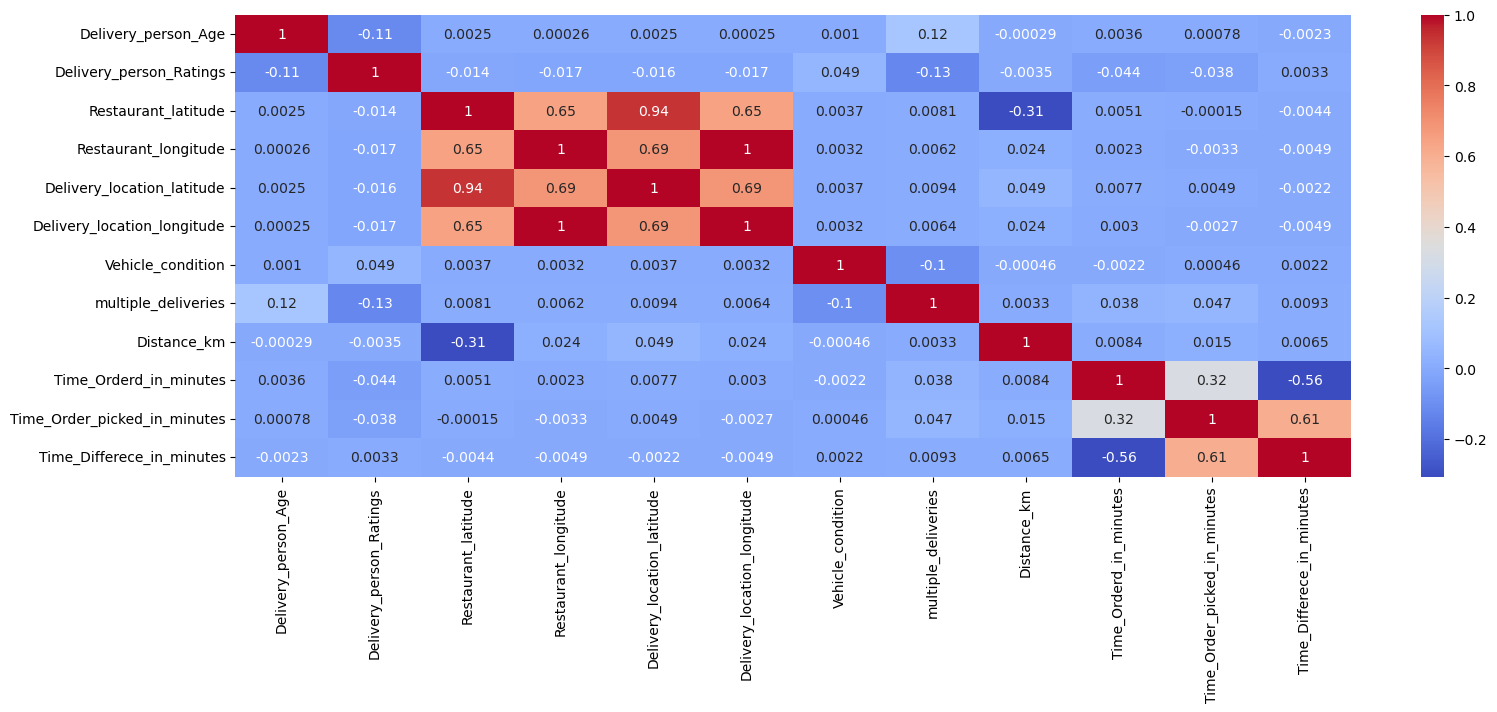

In [19]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols].corr(),annot=True,cmap="coolwarm",robust=True)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV



num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

imputer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first'), cat_cols),
    ('num', num_transformer, num_cols)
],remainder="passthrough")
pipe1 = Pipeline(steps=[
    ('imputer', imputer),
    ("r",CatBoostRegressor(verbose=True, iterations=190, eval_fraction=0.2))
])


pipe2 = Pipeline(steps=[
    ('imputer', imputer),  # assuming imputer is already defined
    ('xgb', XGBRegressor(n_estimators=20, max_depth=9, verbosity=1))  # Use verbosity instead of verbose
])

In [25]:
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

X_train=train_data.drop(["ID","Time_taken (min)"],axis=1)
y_train=train_data['Time_taken (min)']
X_test=test_data.drop(["ID","Time_taken (min)"],axis=1)
y_test=test_data['Time_taken (min)']



In [26]:
rkf=RepeatedKFold(n_splits=3,random_state=42)
cv_results = cross_validate(pipe2, X_train,y_train, cv=rkf, scoring='r2',return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

Mean Train Score: 0.898406653972022
Standard Deviation of Train Scores: 0.002767317055708331
Mean Test Score: 0.8214600957389373
Standard Deviation of Test Scores: 0.0025073332067657448


Mean absolute Error: 3.217082057285124
R-squared on holdout set: 0.8154991388582626
Adjusted R-squared on holdout set: 0.8152310772309681


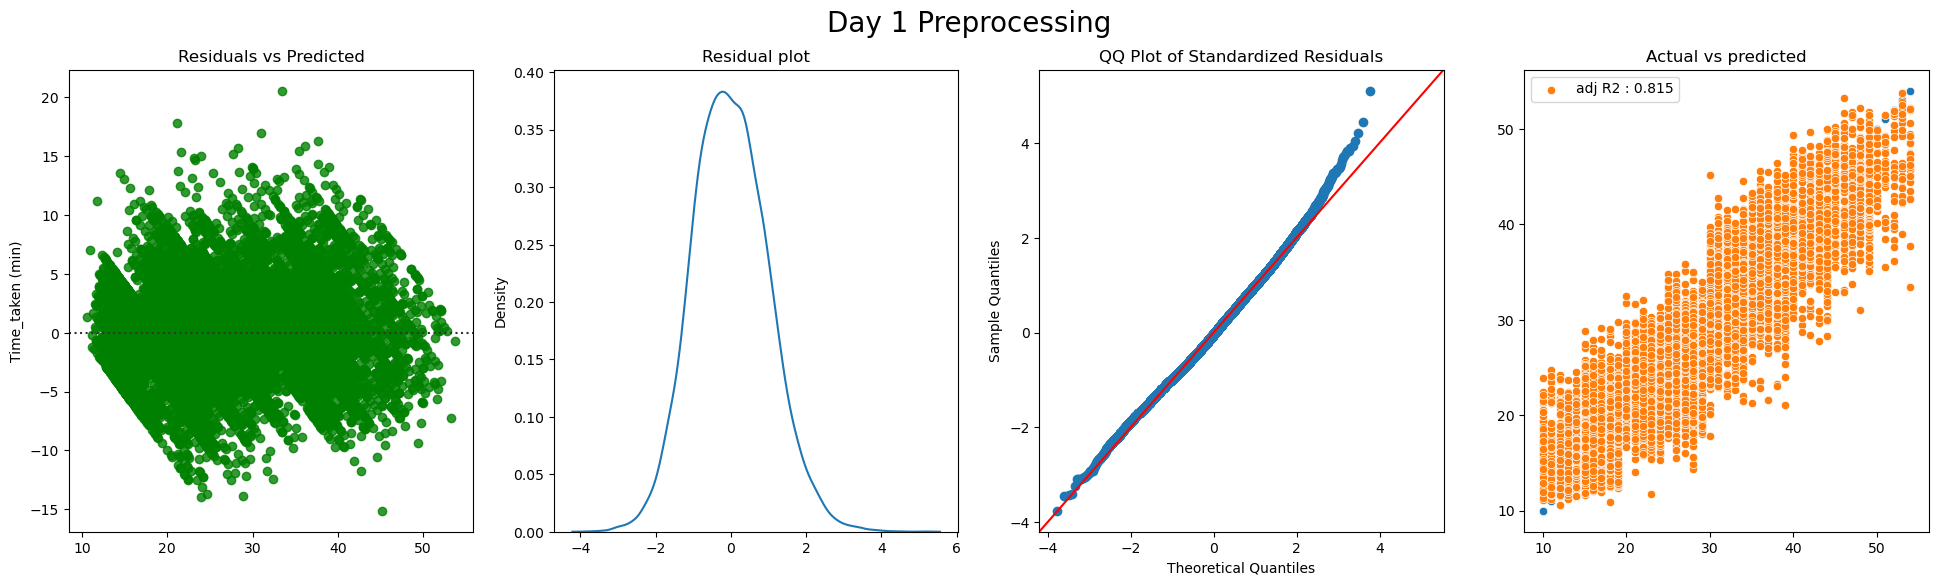

In [28]:
sc=StandardScaler()
predictions = cross_val_predict(pipe2, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.suptitle("Day 1 Preprocessing",fontsize=20)
plt.show()

In [ ]:
# train_data.to_csv("train_data.csv")
# test_data.to_csv("test_data.csv")

In [ ]:
# if list(train_data.columns) != list(test_data.columns):
#     raise ValueError("Train and test data must have the same column names!")

# combined = pd.concat([train_data, test_data], axis=0, ignore_index=True)
# combined.to_csv("combined_dataset.csv", index=False)


In [35]:
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine transformers into a column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, num_cols),
#         ('cat', categorical_transformer, cat_cols)
#     ])

# # Create the pipeline with XGBRegressor and the preprocessor
# pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('xgb', XGBRegressor())
# ])

# # Define the parameter grid
# param_grid = {
#     'xgb__n_estimators': [100, 200, 300],
#     'xgb__learning_rate': [0.01, 0.05, 0.1],
#     'xgb__max_depth': [3, 5, 7],
#     'xgb__subsample': [0.8, 1.0],
#     'xgb__colsample_bytree': [0.6, 0.8, 1.0]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(pipe, param_grid, cv=3, verbose=1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Hyperparameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}


In [36]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])
pipe3 = Pipeline(steps=[
    ('preprocesor', preprocessor),  # Imputer for handling missing values
    ('xgb', XGBRegressor(
        n_estimators=200,       # Best value from grid search
        max_depth=7,            # Best value from grid search
        learning_rate=0.05,     # Best value from grid search
        subsample=1.0,          # Best value from grid search
        colsample_bytree=0.8,   # Best value from grid search
        verbosity=1             # To show progress messages during training
    ))
])
pipe3

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'Restaurant_latitude',
                                                   'Restaurant_longitude',
                                                   'Delivery_location_latitude',
                                                   'Delivery_location_longitude',
                                                   'Vehicle_condition',
                                                   'multiple_deliveries',
                                                   'Distance_k...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [37]:
X_train=train_data.drop(["ID","Time_taken (min)"],axis=1)
y_train=train_data['Time_taken (min)']
X_test=test_data.drop(["ID","Time_taken (min)"],axis=1)
y_test=test_data['Time_taken (min)']

In [38]:
rkf=RepeatedKFold(n_splits=3,random_state=42)
cv_results = cross_validate(pipe3, X_train,y_train, cv=rkf, scoring='r2',return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

Mean Train Score: 0.8777491785595468
Standard Deviation of Train Scores: 0.0020896428075754658
Mean Test Score: 0.8339881979929482
Standard Deviation of Test Scores: 0.0025018799621551137


Mean absolute Error: 3.116401018979548
R-squared on holdout set: 0.8295784757851101
Adjusted R-squared on holdout set: 0.8293308700513247


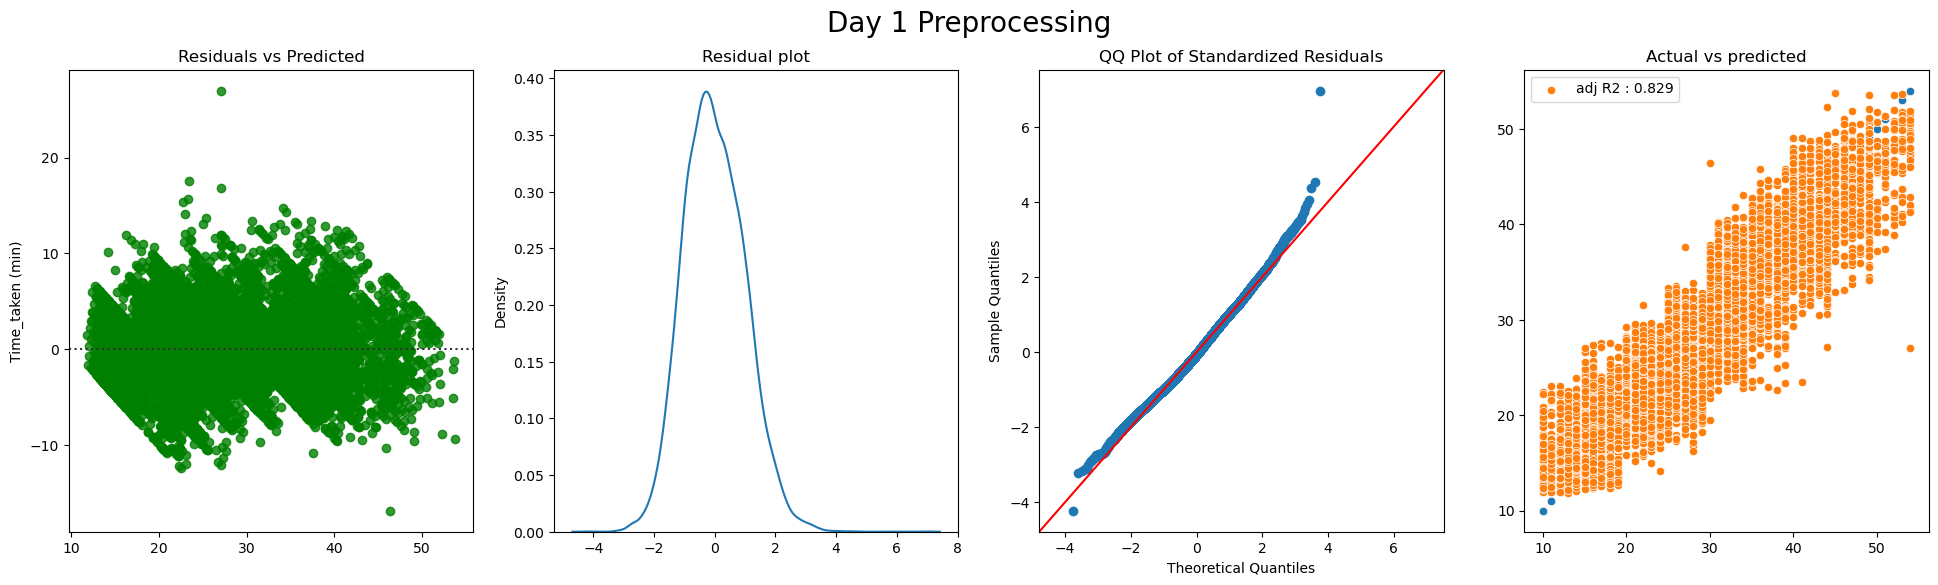

In [39]:
sc=StandardScaler()
predictions = cross_val_predict(pipe3, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.suptitle("Day 1 Preprocessing",fontsize=20)
plt.show()